## HW1: Linear Regression using Gradient Descent
In hw1, you need to implement linear regression by using only numpy, then train your implemented model by the provided dataset and test the performance with testing data

Please note that only **NUMPY** can be used to implement your model, you will get no points by simply calling sklearn.linear_model.LinearRegression

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

## Load data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
filepath = "/content/drive/MyDrive/四下/pattern_recognition/HW/HW1/"

train_df = pd.read_csv(filepath + "train_data.csv")
x_train, y_train = train_df['x_train'], train_df['y_train']

test_data = pd.read_csv(filepath + "test_data.csv")
x_test, y_test = test_data['x_test'], test_data['y_test']

Mounted at /content/drive


## Predefine

In [ ]:
ITERATION = 1000

def build_design_matrix(X, n):
    lenX = len(X)
    Design_Matrix = np.zeros((lenX, n))
    for i in range(lenX):
        xi = X[i]
        Design_Matrix[i] = [xi**power for power in range (n)]
    return Design_Matrix

## Model
* The main functions are Gradient_Descent() and Cal_Test_Loss()

In [ ]:
class LR_Model():
    def __init__(self, x_train, y_train):
      self.X = build_design_matrix(x_train, 2) 
      self.Y = y_train.to_numpy()[:, np.newaxis] #transpose
      self.Weights = []
      self.Train_Loss = []
      self.Test_Loss = []

    def Gradient_Descent(self, LEARNING_RATE=0.02):
      '''
      Firstly, initialize the weight [[β0],[β1]] based on gaussin distribution
      Then, for each iteration : 
      (1) Update the weight by -2η/n * (XT @ Error_Y)
      (2) Record the current: 
          weight [[β0],[β1]] to Weights
          avg(mse_error) to Train_Loss
      '''
      W = np.random.normal(loc=0.0, scale=1.0, size=(2, 1))
      n = len(self.X)
      for iter in range(ITERATION):
        # For iter == 1, record the initialized W directly
        if (iter != 0):
          W -= LEARNING_RATE * -2 * np.matmul(self.X.T, Error_Y) / n 
        self.Weights.append((W[0, 0], W[1, 0])) 
        Error_Y = self.Y - np.matmul(self.X, W)
        self.Train_Loss.append((Error_Y ** 2).sum() / n)

    def Cal_Test_Loss(self, x_test, y_test):
      '''
      For each iteration, multiply test_data by weight[iter] to get the y_pred
      Then the mse error -- avg((y-y_pred)**2), is saved to self.Test_Loss
      '''
      n = len(x_test)
      X = build_design_matrix(x_test, 2)
      Y = y_test.to_numpy()[:,np.newaxis]
      for iter in range(ITERATION):
        w_iter = [[self.Weights[iter][0]],
                  [self.Weights[iter][1]]]
        Error_Y = Y - np.matmul(X, w_iter)
        mse_iter = ((Error_Y ** 2).sum() / n)
        self.Test_Loss.append(mse_iter)

    def Plot_Learning_Curve(self):
      Iter = np.arange(ITERATION) + 1
      plt.scatter(Iter, self.Train_Loss, label="training data", c='paleturquoise')
      plt.scatter(Iter, self.Test_Loss, label="testing data", c='teal')
      plt.title("Learning curve")
      plt.xlabel("iteration")
      plt.ylabel("loss")
      plt.legend()
      plt.show()

    def Plot_Fitting_Line(self):
      w_opt = self.Weights[-1]
      print("   Fitting Line : Y =", str(w_opt[1]) + "X + " + str(w_opt[0]), end ='\n')

      fig = plt.figure(figsize=(10,4))
      plt.subplot(121)

      xs = np.linspace(min(x_train), max(x_train), 1000)
      for iter in range(ITERATION):
        w_iter = self.Weights[iter]
        ys = w_iter[1] * xs + w_iter[0]
        if (iter != ITERATION-2):
          plt.plot(xs, ys, c='antiquewhite', zorder=-1)
        else:
          plt.plot(xs, ys, label = "optimal line", c='red', zorder=1)

      plt.plot(x_train, y_train, '.', c='paleturquoise')
      plt.plot(x_test, y_test, '.', c='teal')
      plt.title("Fitting Line")
      plt.xlabel("X")
      plt.ylabel("Y")
      plt.legend()

      plt.subplot(122)
      B0 = [b[0] for b in self.Weights]
      B1 = [b[1] for b in self.Weights]
      Iter = np.arange(ITERATION) + 1
      plt.plot(Iter, B0, label="intercepts", c='paleturquoise')
      plt.plot(Iter, B1, label="weights", c='teal')
      plt.title("weights and intercepts")
      plt.xlabel("iteration")
      plt.ylabel("Y")
      plt.legend()
      plt.show()

    def Print_MSE(self):
      print("   MSE =", self.Test_Loss[-1])
    

## Train Gradient Descent Model

1. Plot the learning curve of the training, you should find that loss decreases after a few iterations



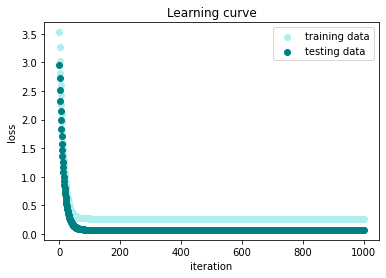


2. What’s the Mean Square Error of your prediction and ground truth ?
   MSE = 0.06870297320744789

3. What’re the weights and intercepts of your linear model?
   Fitting Line : Y = 0.8179703770324709X + 0.7845650819162406


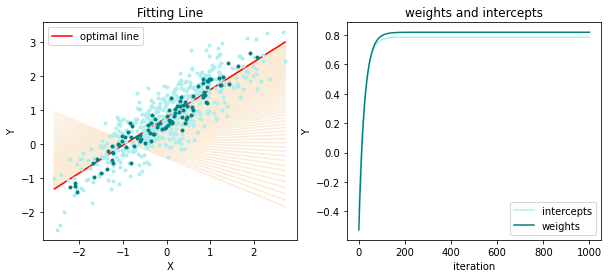

In [ ]:
model = LR_Model(x_train, y_train)
model.Gradient_Descent()
model.Cal_Test_Loss(x_test, y_test)

print("1. Plot the learning curve of the training, you should find that loss decreases after a few iterations\n")
model.Plot_Learning_Curve()
print()

print("2. What’s the Mean Square Error of your prediction and ground truth ?")
model.Print_MSE()
print()

print("3. What’re the weights and intercepts of your linear model?")
model.Plot_Fitting_Line()
print()

## Train Stochastic Gradient Descent

In [ ]:
class BGD_Model(LR_Model):
  '''
  Almost the same with LR_model().
  The different part is that a new parameter "batch_size" is added,
  and instead of the whole dataset, only a batch_size of randomly picked data 
  is used in each iteration.
  '''
  def Gradient_Descent(self, LEARNING_RATE=0.25, batch_size=1):
    n = len(self.X)
    W = np.random.normal(loc=0.0, scale=1.0, size=(2, 1))
    
    for iter in range(ITERATION):
      random_idx = np.random.randint(0, n, batch_size)
      if (iter != 0):
        W -= LEARNING_RATE * -2 * np.matmul(self.X[random_idx].T, Error_Y) / n 

      self.Weights.append((W[0, 0], W[1, 0]))
      Error_Y = self.Y[random_idx] - np.matmul(self.X[random_idx], W)
      self.Train_Loss.append((Error_Y ** 2).sum() / batch_size)

1. Plot the learning curve of the training, you should find that loss decreases after a few iterations



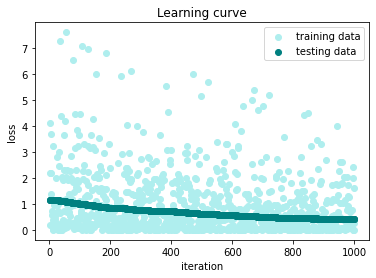


2. What’s the Mean Square Error of your prediction and ground truth ?
   MSE = 0.42339609850773513

3. What’re the weights and intercepts of your linear model?
   Fitting Line : Y = 0.3177770472227243X + 0.43838718187644565


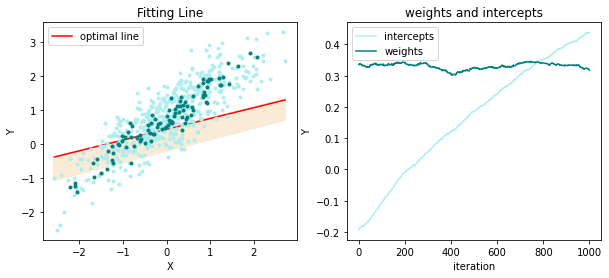

In [ ]:
model = BGD_Model(x_train, y_train)
model.Gradient_Descent(batch_size=1)
model.Cal_Test_Loss(x_test, y_test)

print("1. Plot the learning curve of the training, you should find that loss decreases after a few iterations\n")
model.Plot_Learning_Curve()
print()

print("2. What’s the Mean Square Error of your prediction and ground truth ?")
model.Print_MSE()
print()

print("3. What’re the weights and intercepts of your linear model?")
model.Plot_Fitting_Line()
print()

## Train Mini-Batch Gradient Descent

1. Plot the learning curve of the training, you should find that loss decreases after a few iterations



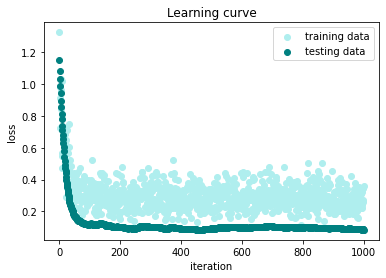


2. What’s the Mean Square Error of your prediction and ground truth ?
   MSE = 0.08463536466968996

3. What’re the weights and intercepts of your linear model?
   Fitting Line : Y = 0.7354520740910869X + 0.7790300099268498


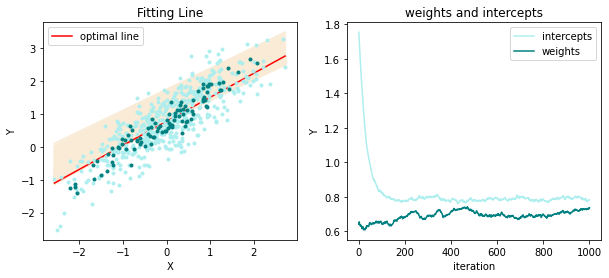

In [ ]:
model = BGD_Model(x_train, y_train)
model.Gradient_Descent(batch_size=32)
model.Cal_Test_Loss(x_test, y_test)

print("1. Plot the learning curve of the training, you should find that loss decreases after a few iterations\n")
model.Plot_Learning_Curve()
print()

print("2. What’s the Mean Square Error of your prediction and ground truth ?")
model.Print_MSE()
print()

print("3. What’re the weights and intercepts of your linear model?")
model.Plot_Fitting_Line()
print()